In [1]:
import numpy as np
import torch
# import torchvision
# from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import Dataset
import torch.nn.functional as F
from scipy import stats
import math
from sklearn.metrics import accuracy_score
%load_ext autoreload
%autoreload 2

from dataset import *

from Multi_GP.multi_GP import scoresOOD
from dataset import Cifar_10_dataset, MNIST_dataset
import umap
import matplotlib.pyplot as plt



In [3]:
parent_dir = os.getcwd()
InD_Dataset = 'MNIST'
net = torch.load(os.path.join(parent_dir, InD_Dataset + "_net.pt"), map_location=torch.device('cpu'))

In [4]:
_, mnistset, _, mnistloader = MNIST_dataset(batch_size = 128, test_batch_size = 128)
mnist16, mnist10 = scoresOOD(net, mnistloader)

In [5]:
_, OOD_set, _, OODloader = Cifar_10_dataset(batch_size = 128, test_batch_size = 128, into_grey=True)
cifar16, cifar10 = scoresOOD(net, OODloader)
total_CNN = np.concatenate((mnist16, cifar16), 0)
reducer_CNN = umap.UMAP(random_state = 42, n_neighbors=10, n_components=2)
UMAPf = reducer_CNN.fit_transform(total_CNN)
UMAPf.shape

Files already downloaded and verified
Files already downloaded and verified


(20000, 2)

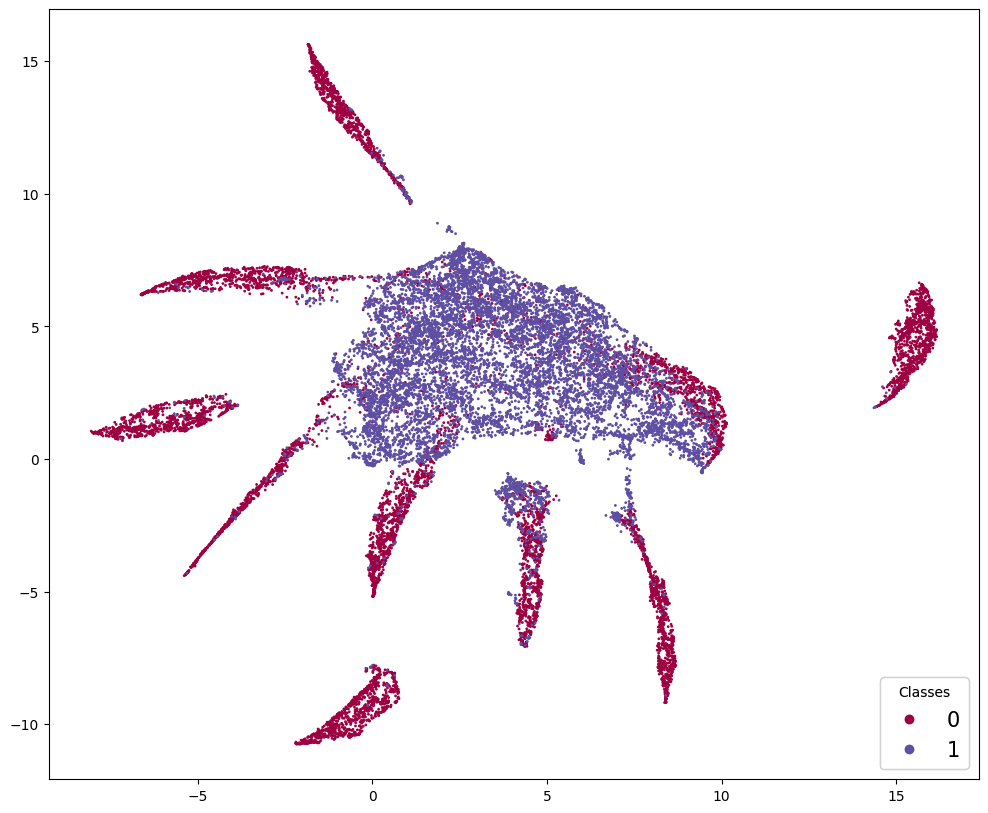

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
color = [0] * len(mnistset) + [1] * len(OOD_set)
scatter = ax.scatter(UMAPf[:, 0], UMAPf[:, 1], c=color, s=1, cmap="Spectral")

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes", prop={'size': 15})
ax.add_artist(legend)

plt.show()

In [42]:
from tensorflow import keras
import cv2

class MNISTDataset(Dataset):
    def __init__(self, image, label):
        #self.image = image.clone().detach # torch.tensor(image, dtype = torch.float32)
        self.image  = image.to(torch.float32)
        self.label = label

    def __len__(self): return len(self.label)

    def __getitem__(self, idx):
        image_ = self.image[idx]
        image_ = image_[None, :]
        label_ = self.label[idx]
        return image_, label_     

transform = transforms.Compose([transforms.Resize(28),
                                transforms.Grayscale(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                                ])
train_set = torchvision.datasets.CIFAR10("./data/cifar10/", download=True, train=False, transform=transform)
cifarloader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)

# x_cifar, y_cifar = train_set.data[0:5000], train_set.targets[0:5000]
# x_cifar_OOD = np.zeros(shape=(5000,28,28))
# for i in range(5000):
#     convert_image = cv2.cvtColor(x_cifar[i, :, :, :], cv2.COLOR_RGB2GRAY)
#     convert_image = cv2.resize(convert_image, (28, 28))
#     x_cifar_OOD[i] = convert_image
# x_cifar_OOD, y_cifar_OOD = torch.from_numpy(x_cifar_OOD), torch.from_numpy(np.array(y_cifar))
# cifarset = MNISTDataset(x_cifar_OOD, y_cifar_OOD)
# cifarloader = torch.utils.data.DataLoader(cifarset, batch_size=50, shuffle=False)




Files already downloaded and verified


In [43]:
cifar16, cifar10 = scoresOOD(net, cifarloader)
total_CNN = np.concatenate((mnist16, cifar16), 0)
reducer_CNN = umap.UMAP(random_state = 42, n_neighbors=10, n_components=2)
UMAPf = reducer_CNN.fit_transform(total_CNN)
UMAPf.shape

(20000, 2)

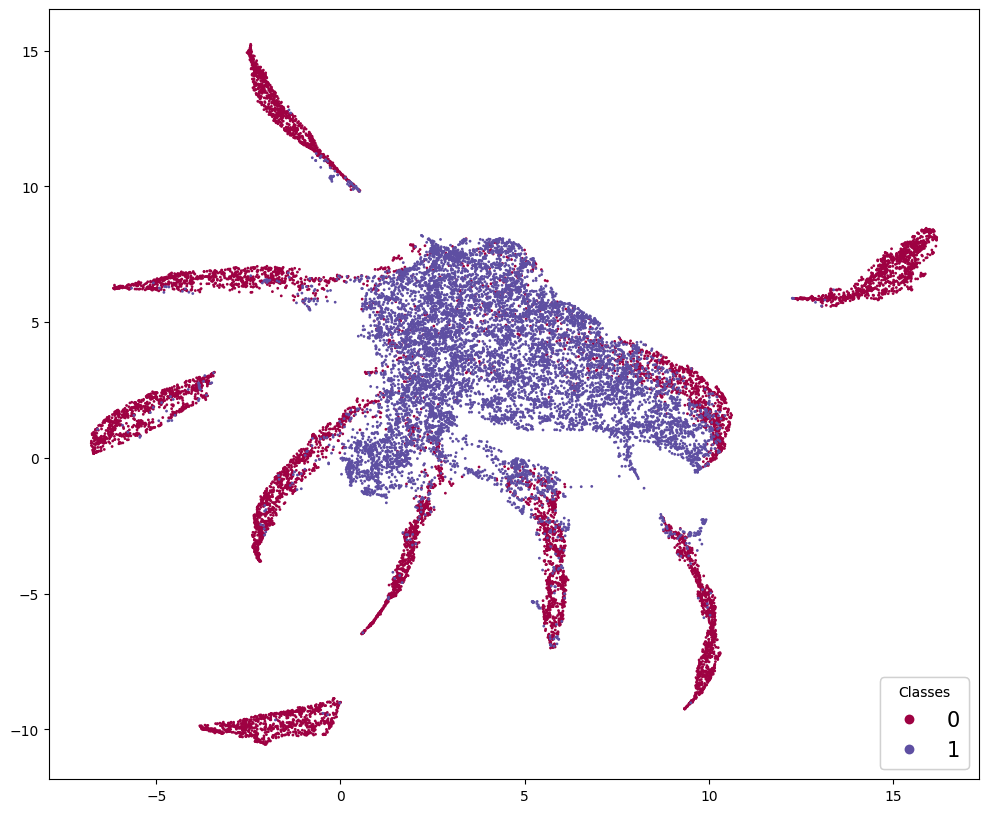

In [44]:
fig, ax = plt.subplots(figsize=(12, 10))
color = [0] * len(mnistset) + [1] * 10000 #len(x_cifar_OOD)
scatter = ax.scatter(UMAPf[:, 0], UMAPf[:, 1], c=color, s=1, cmap="Spectral")

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes", prop={'size': 15})
ax.add_artist(legend)

plt.show()

In [16]:
train_set = torchvision.datasets.CIFAR10("./data/cifar10/", download=True, train=False)

Files already downloaded and verified


In [20]:
train_set.data[1:2000].shape

(1999, 32, 32, 3)